Problem Statement:To predict the happiness score considering all the factors provided in the dataset.

Overview:The World Happiness Report is a landmark survey of the state of global happiness.The report continues to gain global recognition as governments, organizations and civil society increasingly use happiness indicators to inform their policy-making decisions.The residuals, or unexplained components, differ for each country, reflecting the extent to which the six variables either over- or under-explain average life evaluations. These residuals have an average value of approximately zero over the whole set of countries.Dystopia is an imaginary country that has the world’s least-happy people. The purpose in establishing Dystopia is to have a benchmark against which all countries can be favorably compared (no country performs more poorly than Dystopia)in terms of each of the six key variables, thus allowing each sub-bar to be of positive width. The lowest scores observed for the six key variables, therefore, characterize Dystopia.The Dystopia Residual metric actually is the Dystopia Happiness Score(1.85) + the Residual value or the unexplained value for each country.

Data Description : There are total 12 columns out of which 6 columns namely GDP per Capita, Family, Life Expectancy, Freedom, Generosity,Trust Government Corruption contribute in evaluating the happiness in each country.

Country: The country in question.

Region: The region that the country belongs too (different than continent)

Economy: GDP per capita of the country — individuals rank they quality of life based on the amount they earn.

Family: quality of family life, nuclear and joint family.

Health: ranking healthcare availability and average life expectancy in the country

Freedom: how much an individual is able to conduct them self based on their free will

Trust:  the government is corrupt or not.

Generosity: how much their country is involved in peacekeeping and global aid.

Dystopia Residual: Dystopia happiness score (1.85) i.e. the score of a hypothetical country that has a lower rank than the lowest ranking country on the report, plus the residual value of each country (a number that is left over from the normalization of the variables which cannot be explained).

Target Column: Our target variable is "Happiness score".

In [1]:
#importing the required libraries
import numpy as np
import pandas as pd
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Loading dataset
df=pd.read_csv("happiness_score_dataset.csv")
df

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...,...,...,...,...,...
153,Rwanda,Sub-Saharan Africa,154,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
154,Benin,Sub-Saharan Africa,155,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
155,Syria,Middle East and Northern Africa,156,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858
156,Burundi,Sub-Saharan Africa,157,2.905,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302


In [3]:
df.shape #checking data dimension

(158, 12)

we have 158 rows and 12 cloumns including target columns

In [4]:
df.head() #gives the first five rows

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


In [5]:
df.tail() #gives last five rows

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
153,Rwanda,Sub-Saharan Africa,154,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
154,Benin,Sub-Saharan Africa,155,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
155,Syria,Middle East and Northern Africa,156,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858
156,Burundi,Sub-Saharan Africa,157,2.905,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302
157,Togo,Sub-Saharan Africa,158,2.839,0.06727,0.20868,0.13995,0.28443,0.36453,0.10731,0.16681,1.56726


In [6]:
#statistical summary of continuous data ,not on categoriacal data so thats why country and region is not there. 
df.describe()

,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,79.493671,5.375734,0.047885,0.846137,0.991046,0.630259,0.428615,0.143422,0.237296,2.098977
std,45.754363,1.145010,0.017146,0.403121,0.272369,0.247078,0.150693,0.120034,0.126685,0.553550
min,1.000000,2.839000,0.018480,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.328580
25%,40.250000,4.526000,0.037268,0.545808,0.856823,0.439185,0.328330,0.061675,0.150553,1.759410
50%,79.500000,5.232500,0.043940,0.910245,1.029510,0.696705,0.435515,0.107220,0.216130,2.095415
75%,118.750000,6.243750,0.052300,1.158448,1.214405,0.811013,0.549092,0.180255,0.309883,2.462415
max,158.000000,7.587000,0.136930,1.690420,1.402230,1.025250,0.669730,0.551910,0.795880,3.602140


In [7]:
#Categorical data analysis separately
obj = ['Country', 'Region']
for column in df[obj]:
    print(column.upper(),': ',df[column].nunique())
    print(df[column].value_counts().sort_values())
    print('\n')

COUNTRY :  158
Oman            1
Mali            1
Japan           1
Iceland         1
Netherlands     1
               ..
Algeria         1
Burkina Faso    1
Finland         1
Azerbaijan      1
Ivory Coast     1
Name: Country, Length: 158, dtype: int64


REGION :  10
North America                       2
Australia and New Zealand           2
Eastern Asia                        6
Southern Asia                       7
Southeastern Asia                   9
Middle East and Northern Africa    20
Western Europe                     21
Latin America and Caribbean        22
Central and Eastern Europe         29
Sub-Saharan Africa                 40
Name: Region, dtype: int64




In [8]:
def univariateAnalysis_category(obj):
    print("Details of " + obj)
    print("----------------------------------------------------------------")
    print(df[obj].value_counts())
    plt.figure()
    df[obj].value_counts().plot.bar(title="Frequency Distribution of " + obj)#, color = "blue")
    plt.show()
    print("       ")

Details of Country
----------------------------------------------------------------
Oman                  1
Denmark               1
Uganda                1
Guinea                1
Taiwan                1
                     ..
Venezuela             1
Liberia               1
Dominican Republic    1
Germany               1
Ivory Coast           1
Name: Country, Length: 158, dtype: int64


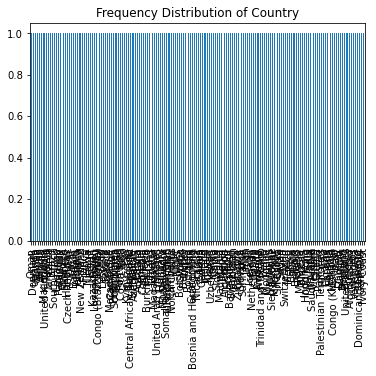

       
Details of Region
----------------------------------------------------------------
Sub-Saharan Africa                 40
Central and Eastern Europe         29
Latin America and Caribbean        22
Western Europe                     21
Middle East and Northern Africa    20
Southeastern Asia                   9
Southern Asia                       7
Eastern Asia                        6
North America                       2
Australia and New Zealand           2
Name: Region, dtype: int64


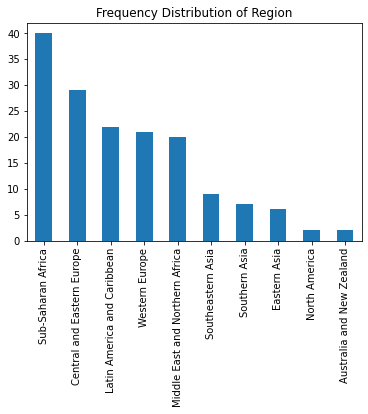

In [9]:
for x3 in obj:
    univariateAnalysis_category(x3)

In [10]:
#checking the null value in the dataset
df.isnull().sum()

Country                          0
Region                           0
Happiness Rank                   0
Happiness Score                  0
Standard Error                   0
Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    0
Generosity                       0
Dystopia Residual                0
dtype: int64

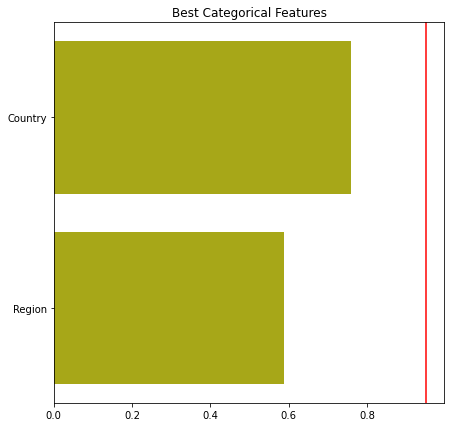

In [11]:
#Chi Square test for Categorical Columns  #we can see country is likely to be best than region so we can remove region.
from scipy.stats import chi2_contingency
l=[]
for i in obj:
    pvalue  = chi2_contingency(pd.crosstab(df['Happiness Score'],df[i]))[1]
    l.append(1-pvalue)
plt.figure(figsize=(7,7))
sns.barplot(x=l, y=obj, color ='y')
plt.title('Best Categorical Features')
plt.axvline(x=(1-0.05),color='r')
plt.show()

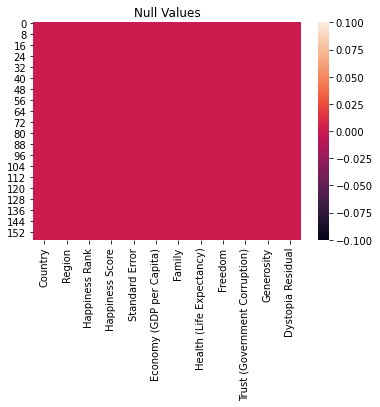

In [12]:
sns.heatmap(df.isnull())
plt.title("Null Values")
plt.show()

There are no null values in the dataset

Label encoding

Label encoding is needed to convert categorical values into numerical values ,here we have country and region as object.  

In [13]:
obj=["Country","Region"]

from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

for val in obj:
    df[val]=le.fit_transform(df[val].astype(str))
df

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,135,9,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,58,9,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,37,9,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,105,9,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,24,5,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...,...,...,...,...,...
153,118,8,154,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
154,13,8,155,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
155,136,4,156,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858
156,21,8,157,2.905,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302


#Checking Correlation


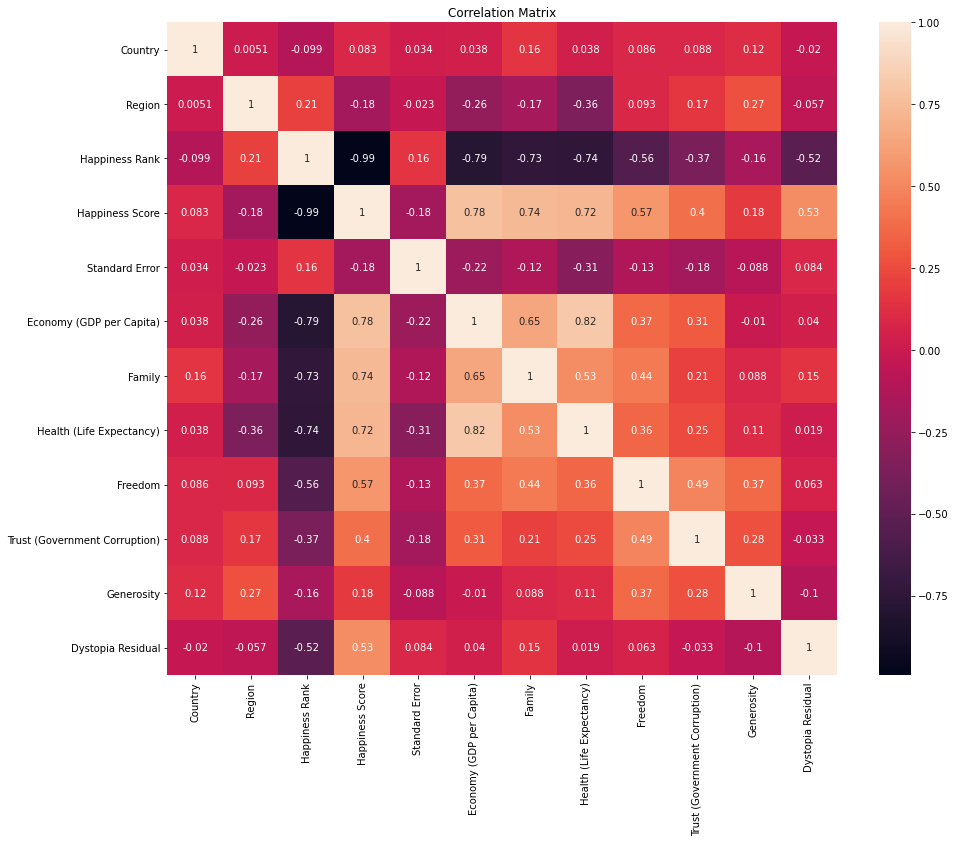

In [14]:
corr_mat=df.corr()
plt.figure(figsize=[15,12])
sns.heatmap(corr_mat,annot=True)
plt.title("Correlation Matrix")
plt.show()

In [15]:
corr_matrix=df.corr()  #correlated values of independent variable with the target varibale in sorted form
corr_matrix['Happiness Score'].sort_values(ascending=False)

Happiness Score                  1.000000
Economy (GDP per Capita)         0.780966
Family                           0.740605
Health (Life Expectancy)         0.724200
Freedom                          0.568211
Dystopia Residual                0.530474
Trust (Government Corruption)    0.395199
Generosity                       0.180319
Country                          0.083380
Region                          -0.176791
Standard Error                  -0.177254
Happiness Rank                  -0.992105
Name: Happiness Score, dtype: float64

Thus wee see that region,standard error,happiness rank very weak correlated with the target
variable others are positively correlated with Economy being the highest of 78% ,next Family being 74%.

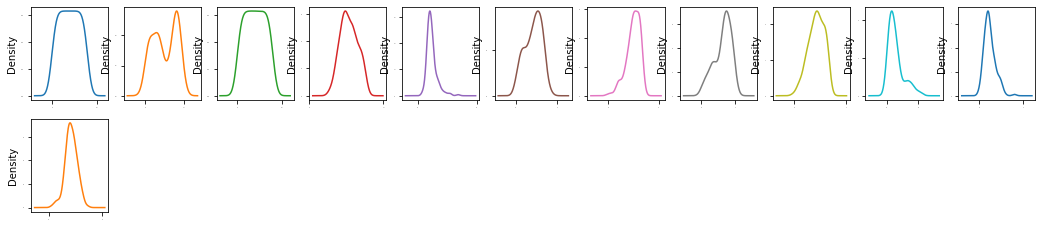

In [16]:
df.plot(kind="density",subplots=True,layout=(6,11),sharex=False,legend=False,fontsize=1,figsize=(18,12))
plt.show()

Thus we can see that skewness is present in multiple column,we will handle skewness in further step.

In [17]:
#Spliting the independent and target variable in x & y 
x=df.drop("Happiness Score",axis=1)
y=df["Happiness Score"]

In [18]:
#checking skewness
x.skew()

Country                          0.000000
Region                          -0.116119
Happiness Rank                   0.000418
Standard Error                   1.983439
Economy (GDP per Capita)        -0.317575
Family                          -1.006893
Health (Life Expectancy)        -0.705328
Freedom                         -0.413462
Trust (Government Corruption)    1.385463
Generosity                       1.001961
Dystopia Residual               -0.238911
dtype: float64

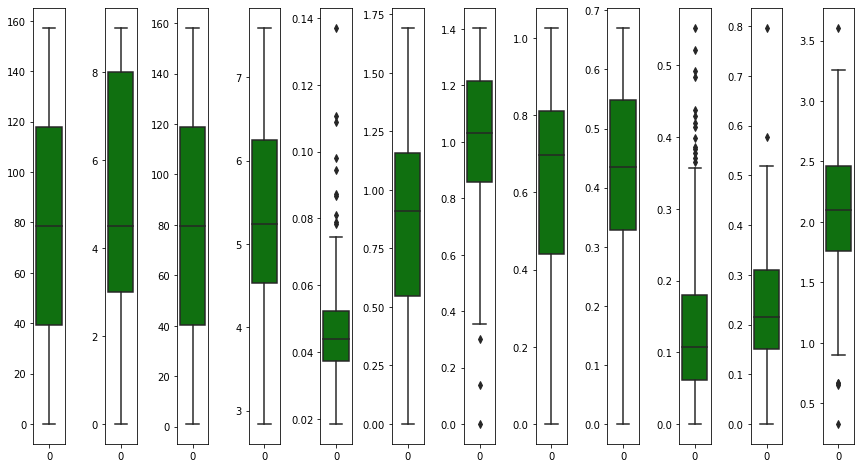

In [19]:
#checking outliers
collist=df.columns.values
ncol=30
nrows=14
plt.figure(figsize=(ncol,3*ncol))
for i in range(0,len(collist)):
    plt.subplot(nrows,ncol,i+1)
    sns.boxplot(data=df[collist[i]],color='green',orient='v')
    plt.tight_layout()

In [20]:
#from the above outcome we can see that columns " "  cloumns have outliers 

Data Cleaning

In [21]:
df.corr()["Happiness Score"]

Country                          0.083380
Region                          -0.176791
Happiness Rank                  -0.992105
Happiness Score                  1.000000
Standard Error                  -0.177254
Economy (GDP per Capita)         0.780966
Family                           0.740605
Health (Life Expectancy)         0.724200
Freedom                          0.568211
Trust (Government Corruption)    0.395199
Generosity                       0.180319
Dystopia Residual                0.530474
Name: Happiness Score, dtype: float64

In [22]:
#Thus we see that region,happiness rank is very less correlated with happiness. so its deleted.

In [23]:
df=df.drop(["Happiness Rank"],axis=1)

In [24]:
df

,Country,Region,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,135,9,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,58,9,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,37,9,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,105,9,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,24,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...,...,...,...,...
153,118,8,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
154,13,8,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
155,136,4,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858
156,21,8,2.905,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302


In [25]:
#Removing Outliers
#Z-SCORE TECHNIQUE
from scipy.stats import zscore
import numpy as np
z=np.abs(zscore(df))
z.shape

(158, 11)

In [26]:
threshold=3
#index number
print(np.where(z>3))

(array([ 27,  40,  64, 115, 128, 147, 153, 155, 157], dtype=int64), array([ 8,  3,  3,  3,  9,  5,  8, 10,  5], dtype=int64))


In [27]:
len(np.where(z>3)[0])

9

In [28]:
df_new=df[(z<3).all(axis=1)]

In [29]:
#print("Old DataFrame",df.shape)
#print("New DataFrame",df_new.shape)
#print("Total dropped columns",df.shape[0]-df_new.shape[0])

In [30]:
df.shape

(158, 11)

In [31]:
df_new.shape

(149, 11)

In [32]:
df_new

,Country,Region,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,135,9,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,58,9,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,37,9,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,105,9,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,24,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...,...,...,...,...
150,66,8,3.655,0.05141,0.46534,0.77115,0.15185,0.46866,0.17922,0.20165,1.41723
151,20,8,3.587,0.04324,0.25812,0.85188,0.27125,0.39493,0.12832,0.21747,1.46494
152,0,7,3.575,0.03084,0.31982,0.30285,0.30335,0.23414,0.09719,0.36510,1.95210
154,13,8,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328


In [33]:
column_to_move = df_new.pop("Happiness Score")

In [34]:
df_new.insert(10, "Happiness Score", column_to_move) #moving target column to last

In [35]:
df_new

,Country,Region,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,Happiness Score
0,135,9,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738,7.587
1,58,9,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201,7.561
2,37,9,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204,7.527
3,105,9,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531,7.522
4,24,5,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176,7.427
...,...,...,...,...,...,...,...,...,...,...,...
150,66,8,0.05141,0.46534,0.77115,0.15185,0.46866,0.17922,0.20165,1.41723,3.655
151,20,8,0.04324,0.25812,0.85188,0.27125,0.39493,0.12832,0.21747,1.46494,3.587
152,0,7,0.03084,0.31982,0.30285,0.30335,0.23414,0.09719,0.36510,1.95210,3.575
154,13,8,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328,3.340


In [36]:
#independent columns
x=df_new.iloc[:,:-1]

In [37]:
#dependent column
y=df_new.iloc[:,-1]

In [38]:
#Transforming the data to remove skewness
from sklearn.preprocessing import power_transform
x=power_transform(x,method='yeo-johnson')

In [39]:
x

array([[ 1.19015533,  1.23451354, -0.95033703, ...,  1.81762514,
         0.65957855,  0.75525527],
       [-0.30048669,  1.23451354,  0.37856182, ...,  0.32967608,
         1.56260401,  1.11116834],
       [-0.80205671,  1.23451354, -1.04140135, ...,  1.95339957,
         0.97722591,  0.70649452],
       ...,
       [-2.10537769,  0.66673577, -1.32081011, ..., -0.19284339,
         1.13425805, -0.32711524],
       [-1.50728158,  0.95527966, -0.69272644, ..., -0.4344978 ,
        -0.31207994, -0.93216364],
       [-1.24683102,  0.95527966,  2.17876604, ..., -0.14727363,
        -0.17248608, -0.55359236]])

In [40]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [41]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.33,random_state=42)
ln=LinearRegression()
ln.fit(x_train,y_train)

LinearRegression()

In [42]:
x_train.shape

(99, 10)

In [43]:
x_test.shape

(50, 10)

In [44]:
y_train.shape

(99,)

In [45]:
y_test.shape

(50,)

In [46]:
ln.coef_

array([ 0.01622847, -0.04262197,  0.00173736,  0.40298593,  0.23902562,
        0.24220901,  0.15479384,  0.08744119,  0.10969069,  0.50898365])

In [47]:
ln.intercept_

5.426152194683533

In [48]:
ln.score(x_train,y_train)

0.9946786379386992

In [49]:
pred=ln.predict(x_test)

In [50]:
print("Predicted Happiness Score :",pred)
print("actual Happiness Score", y_test)

Predicted Happiness Score : [5.24631436 6.97093717 4.50589828 5.12070903 5.14854054 6.4332527
 5.47453485 3.7207654  5.60775678 5.10466821 4.62066512 7.24740456
 6.39378683 7.38037674 6.91236763 5.80857146 3.83955285 5.49053211
 5.76085225 4.00998985 6.53127278 4.3919603  6.66214055 4.19133235
 4.20661581 3.69112891 4.54078647 4.72024185 5.90644799 6.529253
 6.80699829 6.93377947 5.54154867 7.27055541 6.07717359 4.71708416
 5.86326981 6.62812469 7.43978372 6.31711391 4.29247864 5.12833239
 5.01891523 6.99503042 7.32987608 5.07886389 4.00617845 3.6821599
 5.07088629 4.70286728]
actual Happiness Score 76     5.286
18     6.937
121    4.512
81     5.192
79     5.212
32     6.477
67     5.605
145    3.781
71     5.474
85     5.124
112    4.642
12     7.200
37     6.298
9      7.284
19     6.901
58     5.813
141    3.904
72     5.429
57     5.824
136    4.033
30     6.505
127    4.332
26     6.670
132    4.252
133    4.218
150    3.655
113    4.633
104    4.788
47     5.975
31     6.485
22 

In [51]:
from sklearn.metrics import r2_score
print(r2_score(y_test,pred))

0.9965183872853829


In [52]:
print('error:')
print('Mean absolute error :',mean_absolute_error(y_test,pred))
print('Mean squared error:',mean_squared_error(y_test,pred))

print('Root Mean squared Error:',np.sqrt(mean_squared_error(y_test,pred)))

error:
Mean absolute error : 0.052474968260592364
Mean squared error: 0.0042671814207735055
Root Mean squared Error: 0.0653236666207088


In [53]:
#Regularization
from sklearn.linear_model import Lasso,Ridge

In [54]:
#will reduce the coefficient to zero(those features are not informative)
#alpha values could be--->.0001,.001,.01,1.10--->higher values reduce all coefficents towards 0 and impact output
#Default value of alpha =1.0
#alpha=.01
ls=Lasso(alpha=0.0001)
#ls=Lasso(alpha=1.0)#default
ls.fit(x_train,y_train)
ls.score(x_train,y_train)

0.994678572970771

In [55]:
ls.coef_

array([ 0.01611919, -0.04249177,  0.00160353,  0.4030902 ,  0.23908301,
        0.24198704,  0.15476859,  0.08737509,  0.1095791 ,  0.50888765])

In [56]:
len(df_new.columns)
len(ls.coef_)

10

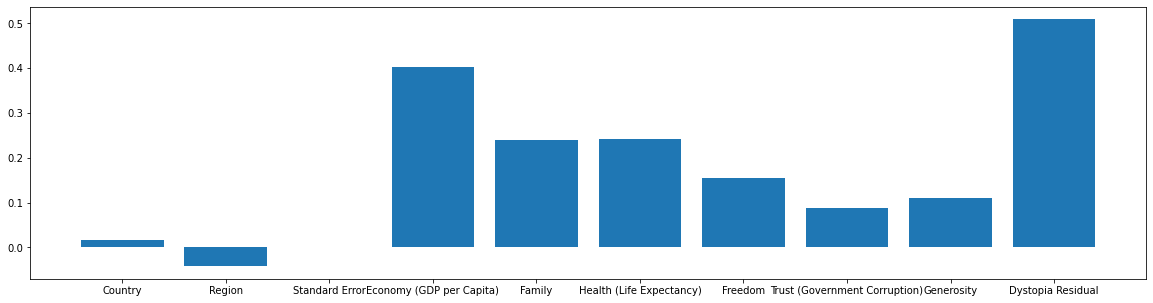

In [57]:
plt.figure(figsize=(20,5))
plt.bar(df.drop(["Happiness Score"],axis=1).columns,ls.coef_)
plt.show()

In [58]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge, SGDRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error

In [59]:
models =[LinearRegression(), 
          Lasso(), 
          Ridge(), 
          SGDRegressor(), 
          DecisionTreeRegressor(), 
          RandomForestRegressor(), 
          AdaBoostRegressor(), 
          GradientBoostingRegressor(),
 ]

for model in models:
    print(model)
    mod=model.fit(x_train,y_train)
    train_rmse=mean_squared_error(mod.predict(x_train),y_train)
    test_rmse=mean_squared_error(mod.predict(x_test),y_test)
    print("Training rmse:", train_rmse)
    print("Testing rmse:", test_rmse)
    print("\n")

LinearRegression()
Training rmse: 0.006469507887508154
Testing rmse: 0.0042671814207735055


Lasso()
Training rmse: 1.2157616439138863
Testing rmse: 1.259397818106316


Ridge()
Training rmse: 0.006520527181646694
Testing rmse: 0.00416435945072142


SGDRegressor()
Training rmse: 0.013458334887660689
Testing rmse: 0.021016805300908624


DecisionTreeRegressor()
Training rmse: 0.0
Testing rmse: 0.21977988000000004


RandomForestRegressor()
Training rmse: 0.020364149969697005
Testing rmse: 0.13990931488600036


AdaBoostRegressor()
Training rmse: 0.04626189464769196
Testing rmse: 0.12863822261331312


GradientBoostingRegressor()
Training rmse: 0.0003399812038112284
Testing rmse: 0.08200535084458416




In [60]:
df_new

,Country,Region,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,Happiness Score
0,135,9,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738,7.587
1,58,9,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201,7.561
2,37,9,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204,7.527
3,105,9,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531,7.522
4,24,5,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176,7.427
...,...,...,...,...,...,...,...,...,...,...,...
150,66,8,0.05141,0.46534,0.77115,0.15185,0.46866,0.17922,0.20165,1.41723,3.655
151,20,8,0.04324,0.25812,0.85188,0.27125,0.39493,0.12832,0.21747,1.46494,3.587
152,0,7,0.03084,0.31982,0.30285,0.30335,0.23414,0.09719,0.36510,1.95210,3.575
154,13,8,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328,3.340


In [61]:
df2=df_new.drop(["Standard Error","Dystopia Residual","Country","Region"],axis=1)

In [62]:
df2

,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Happiness Score
0,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,7.587
1,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,7.561
2,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,7.527
3,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,7.522
4,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,7.427
...,...,...,...,...,...,...,...
150,0.46534,0.77115,0.15185,0.46866,0.17922,0.20165,3.655
151,0.25812,0.85188,0.27125,0.39493,0.12832,0.21747,3.587
152,0.31982,0.30285,0.30335,0.23414,0.09719,0.36510,3.575
154,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,3.340


In [63]:
#independent columns
x1=df2.iloc[:,:-1]

In [64]:
#dependent column
y1=df2.iloc[:,-1]

In [65]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [66]:
x_train,x_test,y_train,y_test=train_test_split(x1,y1,test_size=.33,random_state=42)
ln=LinearRegression()
ln.fit(x_train,y_train)

LinearRegression()

In [67]:
ln.score(x_train,y_train)

0.8001153482534027

In [68]:
pred=ln.predict(x_test)

In [69]:
print("Predicted Happiness Score :",pred)
print("actual Happiness Score", y_test)

Predicted Happiness Score : [5.09732897 6.65241444 4.11572029 5.4568471  5.37672846 5.70208841
 5.43059812 4.54265002 6.87959538 5.13240168 5.28795667 6.72783277
 5.95222745 7.16878884 6.87978303 5.92167386 4.6428968  6.01957841
 5.24378969 4.42174773 5.84739141 5.313848   5.9987888  4.47853506
 5.35750615 4.5241852  4.34392218 4.94810912 5.52534801 6.3124938
 5.8105232  5.92904245 4.81359466 6.04885597 5.84230656 4.08565224
 5.72710853 6.48323273 7.11838562 6.06121534 4.72855451 5.56183849
 5.39591963 7.18024791 6.16953438 4.71264188 4.53131555 3.96080055
 5.69938004 4.90450949]
actual Happiness Score 76     5.286
18     6.937
121    4.512
81     5.192
79     5.212
32     6.477
67     5.605
145    3.781
71     5.474
85     5.124
112    4.642
12     7.200
37     6.298
9      7.284
19     6.901
58     5.813
141    3.904
72     5.429
57     5.824
136    4.033
30     6.505
127    4.332
26     6.670
132    4.252
133    4.218
150    3.655
113    4.633
104    4.788
47     5.975
31     6.485


In [70]:
from sklearn.metrics import r2_score
print(r2_score(y_test,pred))

0.7180029817339035


In [71]:
print('error:')
print('Mean absolute error :',mean_absolute_error(y_test,pred))
print('Mean squared error:',mean_squared_error(y_test,pred))
print('Root Mean squared Error:',np.sqrt(mean_squared_error(y_test,pred)))

error:
Mean absolute error : 0.48194432102902324
Mean squared error: 0.3456250122268311
Root Mean squared Error: 0.5878988112139972


In [72]:
#Regularization
from sklearn.linear_model import Lasso,Ridge

In [73]:
ls=Lasso(alpha=0.0001)
#ls=Lasso(alpha=1.0)#default
ls.fit(x_train,y_train)
ls.score(x_train,y_train)

0.800114368026939

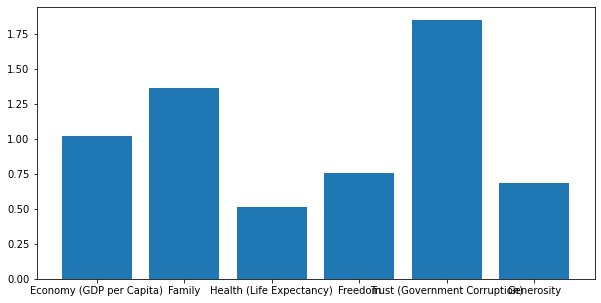

In [74]:
plt.figure(figsize=(10,5))
plt.bar(df2.drop(["Happiness Score"],axis=1).columns,ls.coef_)
plt.show()

In [75]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge, SGDRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error

In [76]:
models =[LinearRegression(),
          Lasso(), 
          Ridge(), 
          SGDRegressor(), 
          DecisionTreeRegressor(), 
          RandomForestRegressor(), 
          AdaBoostRegressor(), 
          GradientBoostingRegressor(),
 ]

for model in models:
    print(model)
    mod=model.fit(x_train,y_train)
    train_rmse=mean_squared_error(mod.predict(x_train),y_train)
    test_rmse=mean_squared_error(mod.predict(x_test),y_test)
    print("Training rmse:", train_rmse)
    print("Testing rmse:", test_rmse)
    print("\n")

LinearRegression()
Training rmse: 0.24301209280059782
Testing rmse: 0.3456250122268311


Lasso()
Training rmse: 1.2157616439138863
Testing rmse: 1.259397818106316


Ridge()
Training rmse: 0.2527249139616889
Testing rmse: 0.34237402637079334


SGDRegressor()
Training rmse: 0.3149586706407445
Testing rmse: 0.2937895257511155


DecisionTreeRegressor()
Training rmse: 0.0
Testing rmse: 0.80345388


RandomForestRegressor()
Training rmse: 0.04854275010101011
Testing rmse: 0.4011065937980003


AdaBoostRegressor()
Training rmse: 0.11002847019975362
Testing rmse: 0.3910265445904548


GradientBoostingRegressor()
Training rmse: 0.008217531386767498
Testing rmse: 0.3830573525941661




Conclusion:The lower the RMSE, the better a given model is able to “fit” a dataset.So we can choose Linear regression or Ridge model as their error is very less.

In [77]:
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
alphavalue={'alpha':[1,0.1,0.01,0.001,0.0001,0]}
model=Lasso()
grid=GridSearchCV(estimator=model,param_grid=alphavalue)
grid.fit(x_train,y_train)
print(grid)


GridSearchCV(estimator=Lasso(),
             param_grid={'alpha': [1, 0.1, 0.01, 0.001, 0.0001, 0]})


In [78]:
#summarize the results of the grid search
print(grid.best_score_)
print(grid.best_estimator_.alpha)
print(grid.best_params_)

0.7497141930495818
0.0001
{'alpha': 0.0001}


In [79]:
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
alphavalue={'alpha':[1,0.1,0.01,0.001,0.0001,0]}
model=Ridge()
grid=GridSearchCV(estimator=model,param_grid=alphavalue)
grid.fit(x_train,y_train)
print(grid)


GridSearchCV(estimator=Ridge(),
             param_grid={'alpha': [1, 0.1, 0.01, 0.001, 0.0001, 0]})


In [80]:
#summarize the results of the grid search
print(grid.best_score_)
print(grid.best_estimator_.alpha)
print(grid.best_params_)

0.7532349271247856
1
{'alpha': 1}


In [81]:
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
alphavalue={'alpha':[1,0.1,0.01,0.001,0.0001,0]}
model=SGDRegressor()
grid=GridSearchCV(estimator=model,param_grid=alphavalue)
grid.fit(x_train,y_train)
print(grid)


GridSearchCV(estimator=SGDRegressor(),
             param_grid={'alpha': [1, 0.1, 0.01, 0.001, 0.0001, 0]})


In [82]:
#summarize the results of the grid search
print(grid.best_score_)
print(grid.best_estimator_.alpha)
print(grid.best_params_)

0.7138281308374096
0.1
{'alpha': 0.1}


Further doing hyperparameter tuning on above models,we find that Ridge model is the best fitted model for predicting happiness score.   